In [1]:
import numpy as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Downloaded from Nasdaq website

In [2]:
Gold = pd.read_csv(r"C:\Users\Don\Downloads\HistoricalData_1679819272773.csv")

In [3]:
Gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/24/2023,1983.8,276299.0,1996.1,2006.5,1977.7
1,03/23/2023,1995.9,257040.0,1974.0,2006.1,1967.3
2,03/22/2023,1949.6,240155.0,1943.5,1982.3,1936.5
3,03/21/2023,1941.1,242914.0,1983.1,1988.7,1938.6
4,03/20/2023,1999.7,66038.0,2008.6,2031.7,1987.0


In [10]:
Gold.tail()

,Date,Close/Last,Volume,Open,High,Low
2538,04/01/2013,1600.9,57638.0,1598.1,1601.6,1595.2
2539,03/29/2013,1595.7,NaN,1595.7,1595.7,1595.7
2540,03/28/2013,1595.7,105714.0,1605.6,1608.3,1594.3
2541,03/27/2013,1607.2,152626.0,1601.0,1609.0,1591.9
2542,03/26/2013,1597.3,125380.0,1606.5,1606.9,1595.2


In [6]:
#HAd to flip the dataset since the graph was backwards

In [4]:
gold = Gold.iloc[::-1]

In [8]:
#Verify that it worked

In [5]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
2542,03/26/2013,1597.3,125380.0,1606.5,1606.9,1595.2
2541,03/27/2013,1607.2,152626.0,1601.0,1609.0,1591.9
2540,03/28/2013,1595.7,105714.0,1605.6,1608.3,1594.3
2539,03/29/2013,1595.7,NaN,1595.7,1595.7,1595.7
2538,04/01/2013,1600.9,57638.0,1598.1,1601.6,1595.2


In [10]:
gold.tail()

,Date,Close/Last,Volume,Open,High,Low
4,03/20/2023,1999.7,66038.0,2008.6,2031.7,1987.0
3,03/21/2023,1941.1,242914.0,1983.1,1988.7,1938.6
2,03/22/2023,1949.6,240155.0,1943.5,1982.3,1936.5
1,03/23/2023,1995.9,257040.0,1974.0,2006.1,1967.3
0,03/24/2023,1983.8,276299.0,1996.1,2006.5,1977.7


<Axes: xlabel='Date'>

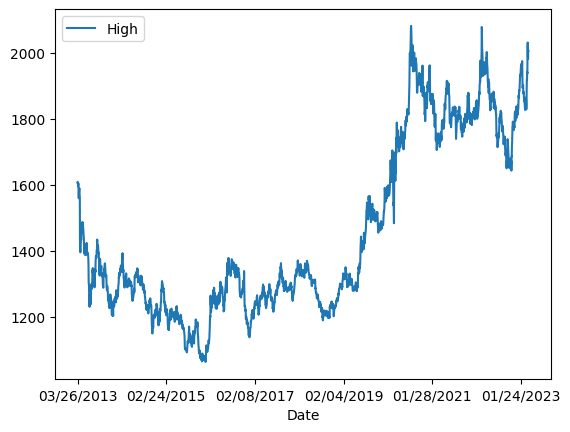

In [6]:
gold.plot(x='Date',y='High')

In [7]:
gold.shape

(2543, 6)

In [13]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 2542 to 0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2543 non-null   object 
 1   Close/Last  2543 non-null   float64
 2   Volume      2509 non-null   float64
 3   Open        2543 non-null   float64
 4   High        2543 non-null   float64
 5   Low         2543 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.3+ KB


In [14]:
gold.describe

<bound method NDFrame.describe of             Date  Close/Last    Volume    Open    High     Low
2542  03/26/2013      1597.3  125380.0  1606.5  1606.9  1595.2
2541  03/27/2013      1607.2  152626.0  1601.0  1609.0  1591.9
2540  03/28/2013      1595.7  105714.0  1605.6  1608.3  1594.3
2539  03/29/2013      1595.7       NaN  1595.7  1595.7  1595.7
2538  04/01/2013      1600.9   57638.0  1598.1  1601.6  1595.2
...          ...         ...       ...     ...     ...     ...
4     03/20/2023      1999.7   66038.0  2008.6  2031.7  1987.0
3     03/21/2023      1941.1  242914.0  1983.1  1988.7  1938.6
2     03/22/2023      1949.6  240155.0  1943.5  1982.3  1936.5
1     03/23/2023      1995.9  257040.0  1974.0  2006.1  1967.3
0     03/24/2023      1983.8  276299.0  1996.1  2006.5  1977.7

[2543 rows x 6 columns]>

In [15]:
#Remove Null values as it will skew results

In [8]:
gold.isnull().sum()

Date           0
Close/Last     0
Volume        34
Open           0
High           0
Low            0
dtype: int64

In [9]:
gold = gold.drop('Volume', axis='columns')

In [10]:
gold.head()

,Date,Close/Last,Open,High,Low
2542,03/26/2013,1597.3,1606.5,1606.9,1595.2
2541,03/27/2013,1607.2,1601.0,1609.0,1591.9
2540,03/28/2013,1595.7,1605.6,1608.3,1594.3
2539,03/29/2013,1595.7,1595.7,1595.7,1595.7
2538,04/01/2013,1600.9,1598.1,1601.6,1595.2


In [19]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import datetime

In [21]:
#DO NOT RUN THIS.
#gold['Date'] = datetime.datetime.strptime('03/26/2013', '%m/%d/%Y').strftime('%Y,%m-%d')

In [12]:
import pandas as pd
gold['Date'] = pd.to_datetime(gold['Date'])
gold = gold.set_index(gold['Date'])
gold = gold.sort_index()

In [13]:
gold.head()

,Date,Close/Last,Open,High,Low
Date,,,,,
2013-03-26,2013-03-26,1597.3,1606.5,1606.9,1595.2
2013-03-27,2013-03-27,1607.2,1601.0,1609.0,1591.9
2013-03-28,2013-03-28,1595.7,1605.6,1608.3,1594.3
2013-03-29,2013-03-29,1595.7,1595.7,1595.7,1595.7
2013-04-01,2013-04-01,1600.9,1598.1,1601.6,1595.2


In [24]:
gold.tail()

,Date,Close/Last,Open,High,Low
Date,,,,,
2023-03-20,2023-03-20,1999.7,2008.6,2031.7,1987.0
2023-03-21,2023-03-21,1941.1,1983.1,1988.7,1938.6
2023-03-22,2023-03-22,1949.6,1943.5,1982.3,1936.5
2023-03-23,2023-03-23,1995.9,1974.0,2006.1,1967.3
2023-03-24,2023-03-24,1983.8,1996.1,2006.5,1977.7


In [14]:
train = gold[:'2021-03-31'].copy()
test  = gold['2022-04-01':].copy()
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (2044, 5)
Test Dataset: (246, 5)


In [15]:
train.head()

,Date,Close/Last,Open,High,Low
Date,,,,,
2013-03-26,2013-03-26,1597.3,1606.5,1606.9,1595.2
2013-03-27,2013-03-27,1607.2,1601.0,1609.0,1591.9
2013-03-28,2013-03-28,1595.7,1605.6,1608.3,1594.3
2013-03-29,2013-03-29,1595.7,1595.7,1595.7,1595.7
2013-04-01,2013-04-01,1600.9,1598.1,1601.6,1595.2


In [31]:
train.tail()

,Date,Close/Last,Open,High,Low
Date,,,,,
2021-03-25,2021-03-25,1727.3,1736.0,1732.2,1722.5
2021-03-26,2021-03-26,1734.7,1727.5,1737.9,1721.2
2021-03-29,2021-03-29,1714.6,1732.4,1734.8,1705.6
2021-03-30,2021-03-30,1686.0,1713.0,1714.8,1678.3
2021-03-31,2021-03-31,1715.6,1685.9,1716.3,1677.3


In [16]:
test.head()

,Date,Close/Last,Open,High,Low
Date,,,,,
2022-04-01,2022-04-01,1923.7,1942.4,1944.5,1921.4
2022-04-04,2022-04-04,1934.0,1927.1,1941.6,1918.2
2022-04-05,2022-04-05,1927.5,1937.3,1948.9,1920.9
2022-04-06,2022-04-06,1923.1,1927.6,1937.6,1916.2
2022-04-07,2022-04-07,1937.8,1928.1,1941.7,1923.3


In [33]:
test.tail()

,Date,Close/Last,Open,High,Low
Date,,,,,
2023-03-20,2023-03-20,1999.7,2008.6,2031.7,1987.0
2023-03-21,2023-03-21,1941.1,1983.1,1988.7,1938.6
2023-03-22,2023-03-22,1949.6,1943.5,1982.3,1936.5
2023-03-23,2023-03-23,1995.9,1974.0,2006.1,1967.3
2023-03-24,2023-03-24,1983.8,1996.1,2006.5,1977.7


In [17]:
train['Return'] = train['Close/Last'].pct_change()
train['Lagged_Return'] = train['Return'].shift()
test['Return'] = test['Close/Last'].pct_change()
test['Lagged_Return'] = test['Return'].shift()


In [18]:
train.dropna(inplace=True)
test.dropna(inplace=True)
#Remove all null values again

In [19]:
x_train = train['Lagged_Return'].to_frame()
y_train = train['Return']
x_test = test['Lagged_Return'].to_frame()
y_test = test['Return']

In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)


LinearRegression()

In [21]:
y_pred = LR.predict(x_test)

In [22]:
import matplotlib.pyplot as plt

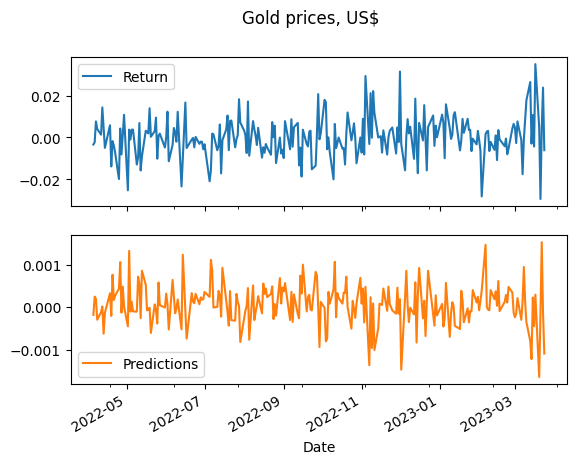

In [23]:
results = y_test.to_frame() 
results["Predictions"] = LR.predict(x_test)
results.plot(subplots=True, title='Gold prices, US$')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(x_test)

In [29]:
# print(test_data_prediction)

In [30]:
metrics.r2_score(y_test, test_data_prediction)

-0.16130561454777093

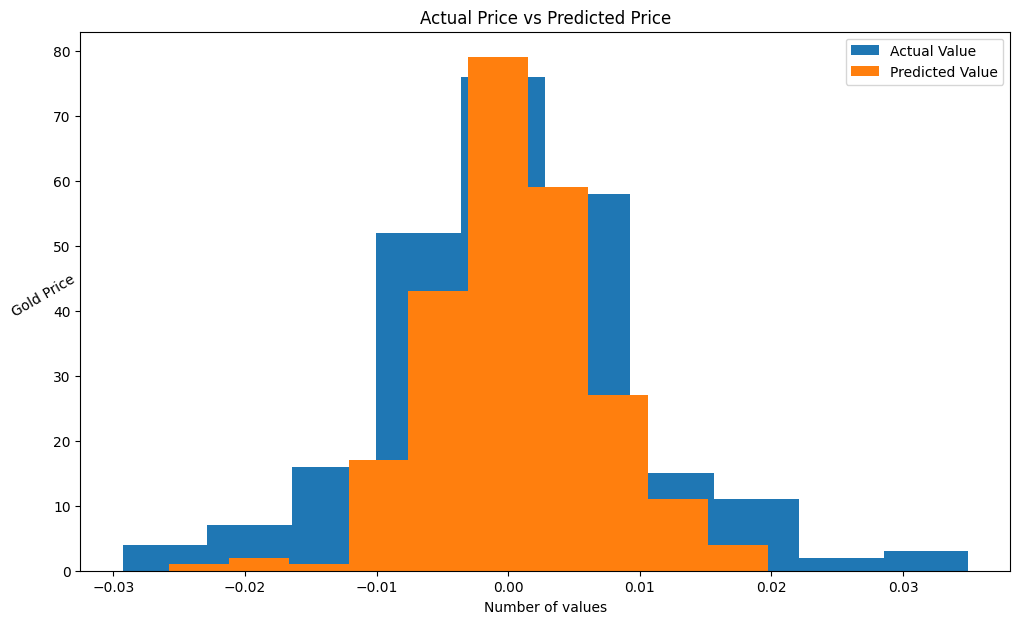

In [31]:
plt.figure(figsize = (12,7))
plt.hist(y_test, label = 'Actual Value')
plt.hist(test_data_prediction, label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price', rotation=30)
plt.legend()
plt.show()

In [32]:
accuracy = regressor.score(x_test, y_test)
'Accuracy: {}%'.format(int(round(accuracy*100)))

'Accuracy: -16%'

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linear = LinearRegression().fit(x_train, y_train)
print("Linear Regression model")
print("Gold Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[0], linear.intercept_))

Linear Regression model
Gold Price (y) = -0.05 * 3 Days Moving Average (x1) + -0.05 * 9 Days Moving Average (x2) + 0.00 (constant)


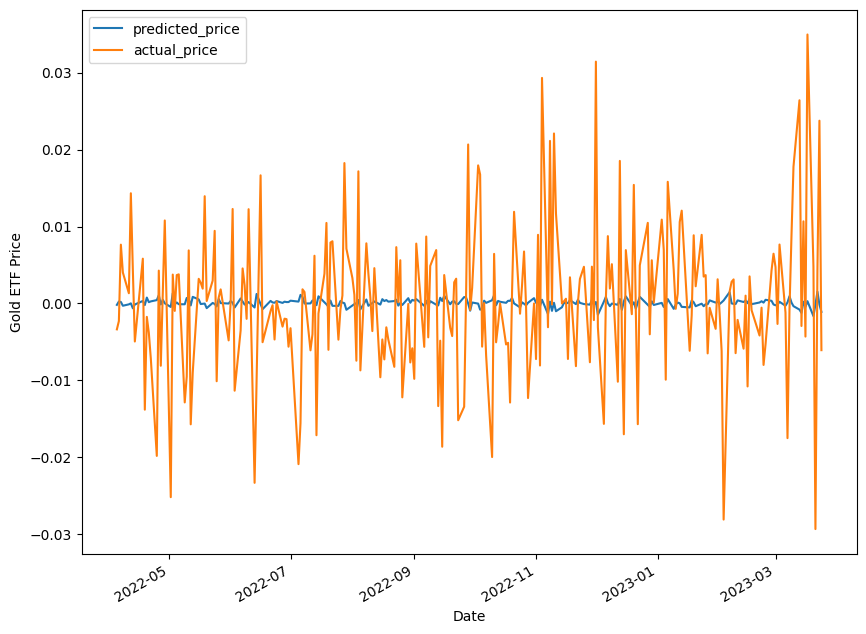

In [61]:
predicted_price = linear.predict(x_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 8))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [64]:
import numpy as np

In [62]:
train_pred = LR.predict(x_train)

In [65]:
scaling_factor = np.mean(y_train / train_pred)

In [66]:
y_pred_new = scaling_factor * y_pred

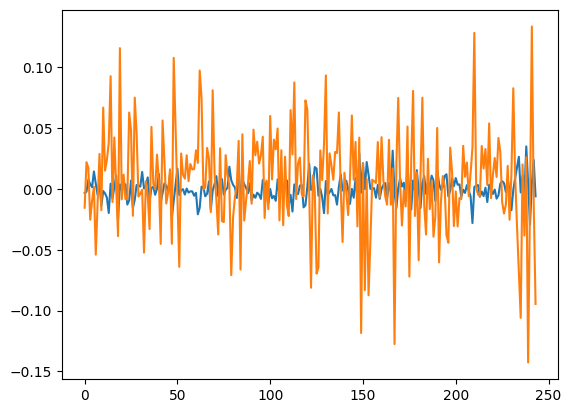

In [68]:
plt.plot(y_test.values)
plt.plot(y_pred_new)

In [69]:
mae_without_scaling = np.mean(np.abs(y_test - y_pred))
mae_with_scaling = np.mean(np.abs(y_test - y_pred_new))

In [70]:
print(f"MAE (without scale): {mae_without_scaling}, MAE (with scale): {mae_with_scaling}")

MAE (without scale): 0.007059519057670522, MAE (with scale): 0.03179437770002664
